## Use Case -  Lending Club emarket place needs to identify consumer attributes and loan    attributes infuencing the tendency to default

    ### The dataSet called loan_csv is provided and loaded here 
    ### The company wants to understand the driving factors (or driver variables) behind loan default.
    ### The company can utilise this knowledge for its portfolio and risk assessment.
    ### This is an EDA exercise to do some descriptive analysis on the data provided 
   


In [627]:
### Loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

### Loading the dataset
### The intial dataframe loaded will be called 'ld'
### The loan dataset loaded is loaded in the session from local computer, You can load this dataset as suitable to you.

ld = pd.read_csv(r'C:\Users\asing216\Desktop\PythonProj\loan.csv')


C:\Users\asing216\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [628]:
### Checking the shape of dataframe loaded to identify row and column count
print(ld.shape)
print(ld.head())


(39717, 111)
        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN  

### The ld dataframe loaded from loan.csv dataset has 39717 rows and 111 columns
    ### Data clean exercie to follow
    ### Since there are 111 colulmns , visual/manual inspection of the oolumns is necessary to get idea of sparse/NA columns/variables
    

In [629]:
### Remove all columns which have only NA values or missing values . 
### Many columns were identfified as having missing/na values after visual inspection of the dataset.
### The na columns could be removed from dataset manaully of via the code to follow.
### Identify null value columns and retrun a dataframe
nld = ld[ld.columns[ld.isnull().any()]]
nld.shape

(39717, 68)

## ***The nld data frame has 39717 rows and 68 columns which has null/na values
    ## Identify a threshold to drop all coulmns with na values greater than the identfied threshold
    ## Assumption is made that any clumns with more than 60 Percent NA values will not be useful in analysis
    ## The nld dataframe was just to check shapeof the null values dataframe
    ## Drop null values column from the main ld dataframe

In [630]:
### Assumption is made to remove all coulns which have more than 60 percent NA values. 
### This assumption is made after carefully checking the null values in each colunn
### Calc threshold value
thr = 39717*(60/100)
print(int(thr))

23830


In [631]:
### Threshold for cloumns na missing/na values is 27801
### Drop any coulmns with more than the threshold record
### ld.isnull().sum(axis=0) > 27801
newld = ld.loc[:, (ld.isnull().sum(axis=0) >= 23830)]

In [632]:
### identified atleast 57 coulumns which have na values more than 60 percent.Dropping those in following code from ld
newld.head(20)

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38.0,NaN,Jun-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [633]:
### dropping the na columns from main dataframe ld
ld = ld.drop(ld.columns[ld.isnull().sum(axis=0) >= 23830], axis=1)

## The updated ld data frame has 39717 rows and 54 columns which has limited null/na values after droping columns
    ### Now analyse the rows to drop all rows with more than 60 percent null values
    ### Assumption is if any row has more than 60 percent missing vlues or NA we should drop the row

In [634]:
rthres = 54 *(60/100)
print(int(rthres))
ld.drop(ld[ld.isna().sum(axis = 1) >=rthres ].index , inplace = True)

32


In [635]:
ld.shape

(39717, 54)

## The updated ld data frame has 39717 rows and 54 columns which has limited null/na values after handling missing rows value
    ### Now analyse the dataframe for duplicates across the unquie identifiers
    ### According to the data disctionary loaded here id and member_id should be unique

In [636]:
### Visual inspection of the data dictionary is done and understood
### Loading it here in case if it has some use later on
dd = pd.read_excel(r'C:\Users\asing216\Desktop\PythonProj\Data_Dictionary.xlsx')


In [637]:
###  Removing duplicate values from ID and member_id if any.
### ID is unique for each loan and member_id is unique for each customer
### So the combination of both can create a primary key , meaning the combined primary key
### It is observerd manaully that for each purpose/kind of loan,  id can be unique and is not a single value
### Creating additional column to be used maybe later.



### checking this unique_id to find any duplicates in the dataframe
print(len(ld.id.unique()))
print(len(ld.member_id.unique()))

39717
39717


In [638]:
### The length of unique_id is same as the number of rows therefore inferring that there are no duplicate records in the dataset
### Univariate , Segmented Univariate and Biraviate analysis to follow

In [639]:
ld.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0



### Continue Univariate analysis and fix coumns values , type etc along the way


In [640]:
### drop id and member id
### id and member_id can be dropped because we have one column added as unique
ld = ld.drop(['id','member_id'],axis = 1)

### As per DD , loan amount , funded amount and funded amount_inv are:
    ### Loan_amount ---The listed amount of the loan applied for by the borrower. 
    ### funded amount ---The total amount committed to that loan at that point in time.
    ### funded_amnt_inv	---- The total amount committed by investors for that loan at that point in time.
    
### Basically funded amount  can never be larger than loan amount and funded amount by investors cannot be larger than funded amount . 

#### So the rule --loan_amnt >= funded_amnt >= funded_amnt_inv  should always be true and a subset dataframe retruned with this clause should be empty.

In [641]:
### Checking the above mentioned theory for correctness 
### checking type of these tree columns.
print(ld.loan_amnt.dtype)
print(ld.funded_amnt.dtype)
print(ld.funded_amnt_inv.dtype)

int64
int64
float64


In [642]:
### subset from main dataframe 
newldf = ld.iloc[:,:3]
#### using describe to check statistcs 
newldf.describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868
std,7456.670694,7187.238670,7128.450439
min,500.000000,500.000000,0.000000
25%,5500.000000,5400.000000,5000.000000
50%,10000.000000,9600.000000,8975.000000
75%,15000.000000,15000.000000,14400.000000
max,35000.000000,35000.000000,35000.000000


In [643]:
### check the rule (loan_amnt >= funded_amnt >= funded_amnt_inv ) 
#### the rule can be used for outlier detection as well apart from standard iqr methods and box plot visualisations

newldf['rule_check'] = np.where((ld['loan_amnt'] >= ld['funded_amnt']) & (ld['funded_amnt'] >= ld['funded_amnt_inv']) ,0,1 )
newldf.describe()

### The describe shos that the rule never failed and hence min , max for rule_check is 0
### The data within these three coluns look fine basis the standard statistcs given by describe

,loan_amnt,funded_amnt,funded_amnt_inv,rule_check
count,39717.000000,39717.000000,39717.000000,39717.0
mean,11219.443815,10947.713196,10397.448868,0.0
std,7456.670694,7187.238670,7128.450439,0.0
min,500.000000,500.000000,0.000000,0.0
25%,5500.000000,5400.000000,5000.000000,0.0
50%,10000.000000,9600.000000,8975.000000,0.0
75%,15000.000000,15000.000000,14400.000000,0.0
max,35000.000000,35000.000000,35000.000000,0.0


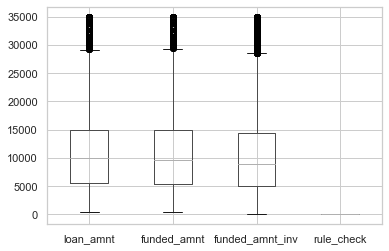

In [644]:
### Visualization using box plot for these three variable
newldf.boxplot()
plt.show()
### the visualization using box plot looks standard with amost identical quantiles
### the gap between max and values outside the boundaries is also consistent , therefore its seems there are no outliers

In [645]:
### Cleaning some more varaiables like 'int_rate' , and removing some not reuired variables 
##pymnt_plan - only has one value , not required
##url --- url is not required
##desc -- purpose is already available , not useful
##title --  purpose is already available , not useful
##zip_code  -- encoded variable , not useful

### Cleaning rows for removeing 'Current' from the dataset (target variable - loan status)
### 'Current' is unknown and its difficlut to determine if the borrower  will default of not

ld = ld.drop(['pymnt_plan','url','desc','title','zip_code'],axis = 1)
ld.drop(ld[ ld['loan_status'] == 'Current' ].index,inplace =True)


### Cleaning  variables like 'int_rate'  

In [646]:
###Function to clean a rate variable
def clean(string):
    clean="".join(filter(lambda x: x!='%', string))
    return float(clean)

ld['int_rate'] = ld['int_rate'].apply(clean)


In [647]:
ld.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Data Cleaning Exercise complete
### Univariate and BiVariate analysis to follow

    ### Univariate analysis
        The following variables are categorical and can be used alng with  the target variable to indentify soem patterns
        term
        grade
        sub_grade
        emp_length
        home_ownership
        verification_status
        purpose
        addr_state

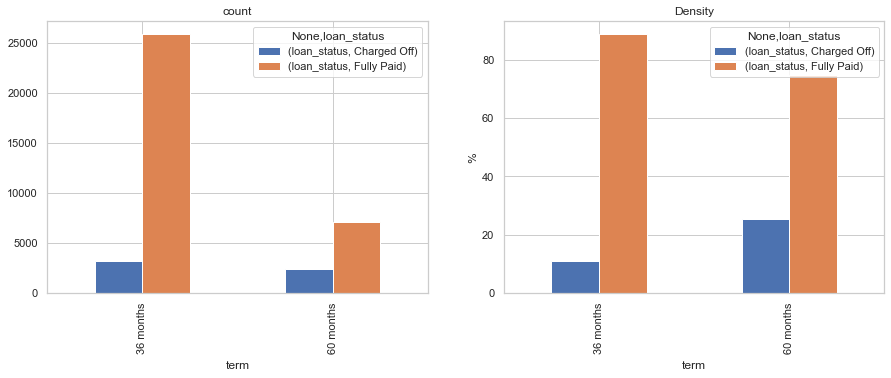

In [648]:
### Checking each categorical variable - 'Term'

plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['term'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['term'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('term') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

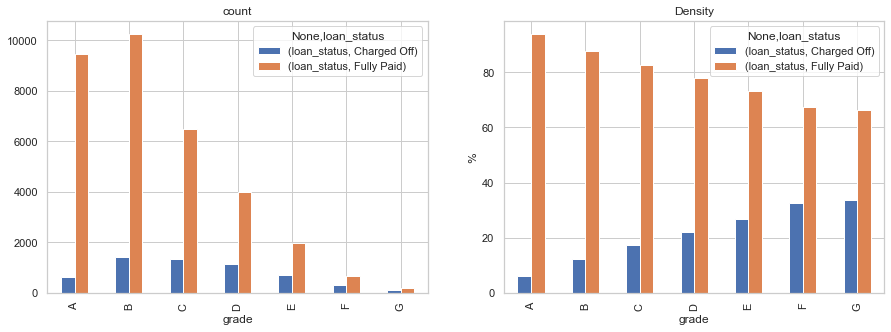

In [649]:
### Checking each categorical variable - Grade

plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['grade'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['grade'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('grade') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

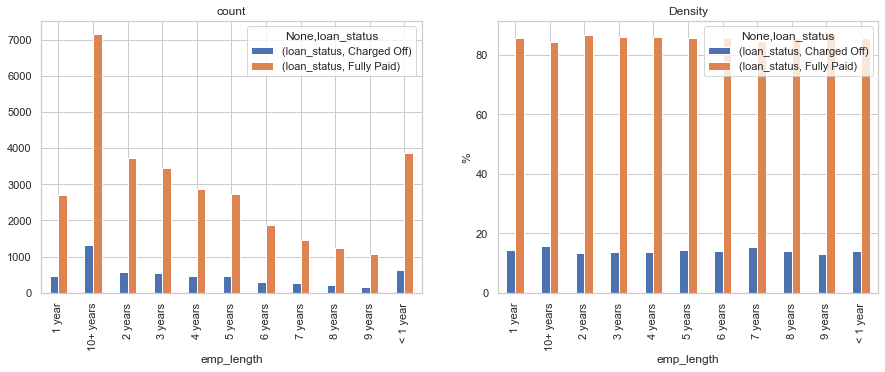

In [650]:
### Checking each categorical variable -emp_lenght
### n/a values in employe lenght are assumed to ne not known

plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['emp_length'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['emp_length'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('emp_length') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

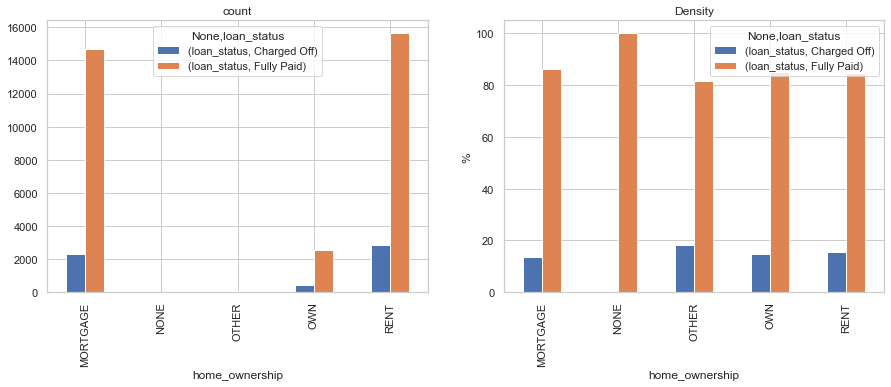

In [651]:
### Checking each categorical variable -home_ownership
plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['home_ownership'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['home_ownership'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('home_ownership') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

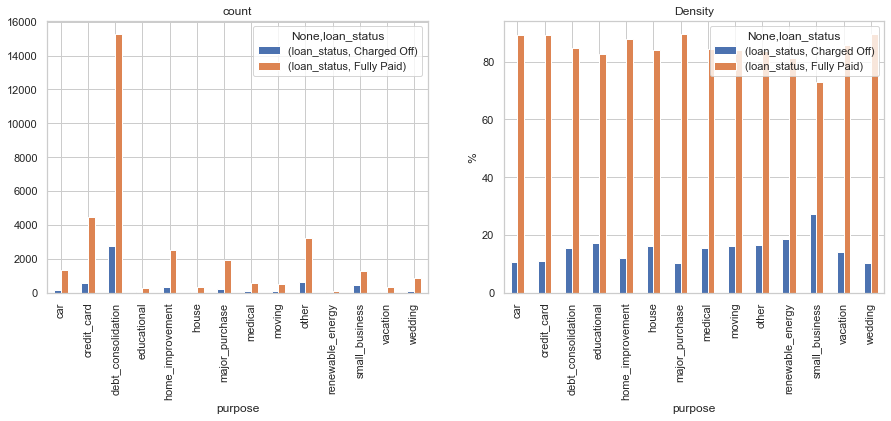

In [652]:
### Checking each categorical variable -purpose
plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['purpose'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['purpose'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('purpose') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

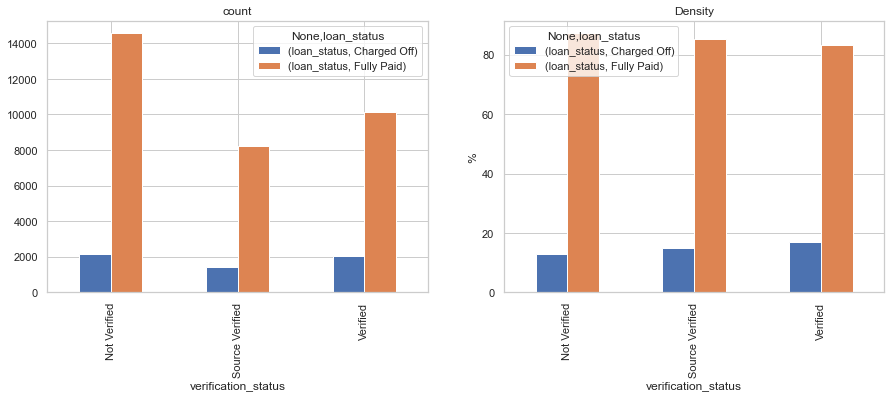

In [653]:
### Checking each categorical variable -verification_status
plt.figure(figsize=[15,5])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['verification_status'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['verification_status'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('verification_status') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='count'>

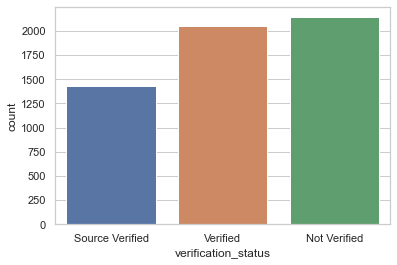

In [654]:
### The above plot does not show clearly so using just countplot to look at ditribution

sns.countplot(x='verification_status', data=ld[ld['loan_status']=='Charged Off'])

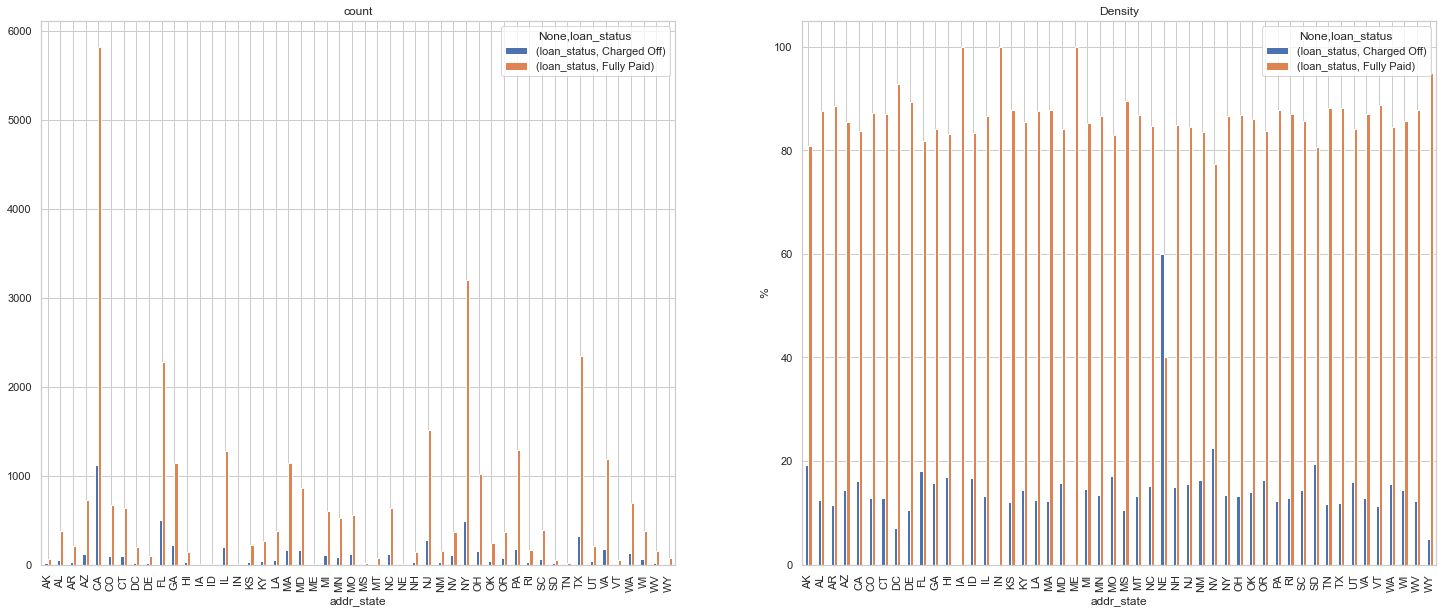

In [655]:
### Checking each categorical variable -adress
plt.figure(figsize=[25,10])  ## define fig size
ax=plt.subplot(1,2,1) # for multiplot (rows,columns,index)
pd.DataFrame(ld.groupby(['addr_state'])['loan_status'].value_counts()).unstack().plot.bar(ax=ax) # using inbuilt unstack and plot function in pandas 
plt.title('count')

ax=plt.subplot(1,2,2)

temp=pd.DataFrame(ld.groupby(['addr_state'])['loan_status'].value_counts()).unstack() 
temp=(temp.T/temp.T.sum()*100).T  ## Convert in density or in %
ax=temp.plot.bar(ax=ax)
plt.ylabel('%') # how to label y using matplotlib
plt.xlabel('addr_state') # how to label x using matplotlib
plt.title('Density') # how to define title using matplotlib
plt.show()

<AxesSubplot:xlabel='addr_state', ylabel='count'>

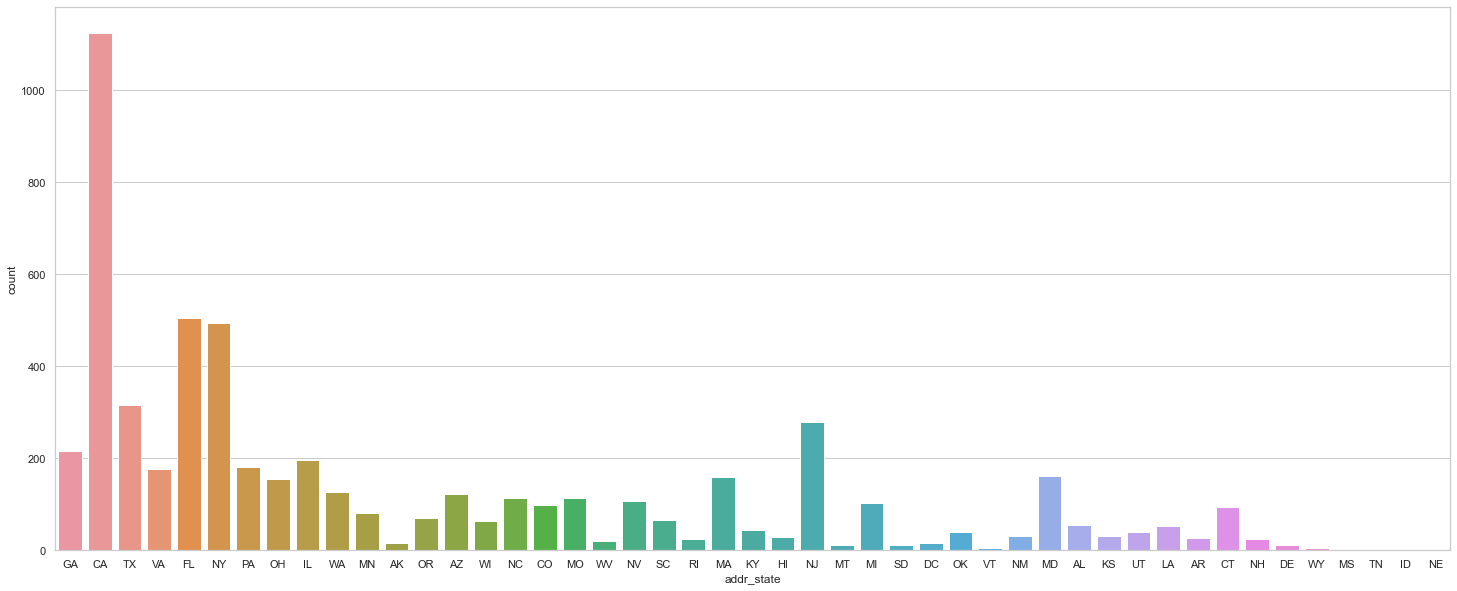

In [656]:
### The above plot does not show clearly so using countplot to find the distributio
plt.figure(figsize=[25,10]) 
sns.countplot(x='addr_state', data=ld[ld['loan_status']=='Charged Off'])


### Categorical Univariate analysis is complete
     ### some of the key findings
     1>The density of loan defaulters with higher term duration is higher and is about 25%
     2>Count of loan defaulters is higher in the category for debt consolidation.
     3>The density of defaulters is higher when the loan is taken for small businesses.
     3>The loan default density increases as the grades chnage from A to G with G having the highest defaulter rate.
     4>Mortgage and Rent types of home ownership have higher count of defaults
     5>NE has the highest defaulters density with CA having the highest count.
     
### These results need to verified with futher analysis of the dataset 
### Univariate analysis for Continous data and Bivariate Analysis to follow

     The following are the list of contonous varaibles to be used here:
     loan_amnt 
     int_rate
     annual_inc
     dti
     delinq_2yrs
     open_acc
     total_acc
     revol_bal
     revol_util
     total_acc
     out_prncp

In [657]:
### checking for missing values and outliers in these features
print(ld['loan_amnt'].isnull().sum())
print(ld['int_rate'].isnull().sum())
print(ld['annual_inc'].isnull().sum())
print(ld['dti'].isnull().sum())
print(ld['delinq_2yrs'].isnull().sum())
print(ld['open_acc'].isnull().sum())
print(ld['total_acc'].isnull().sum())
print(ld['revol_bal'].isnull().sum())
print(ld['revol_util'].isnull().sum())
print(ld['total_acc'].isnull().sum())
print(ld['loan_amnt'].isnull().sum())
print(ld['out_prncp'].isnull().sum())

0
0
0
0
0
0
0
0
50
0
0
0


In [658]:
### Revol_Util has missing values and its a percent field, cleaning and imputing missing values.
### Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
### handling missing values : since there are just 50 records we can safely remove them from dataset and cleaning the %.

ld.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
ld['revol_util'] = ld['revol_util'].apply(clean)
print(ld.revol_util.isna().sum())
print(ld['revol_util'].dtype)
print(ld.shape)

0
float64
(38527, 47)


In [659]:
### describe the contonous columns which seem important for further anaylyis.

ld[['loan_amnt', 'int_rate','annual_inc','installment','dti','delinq_2yrs','open_acc','total_acc','revol_bal','revol_util']].describe()

###  This info will be used for createing bins for more analysis

,loan_amnt,int_rate,annual_inc,installment,dti,delinq_2yrs,open_acc,total_acc,revol_bal,revol_util
count,38527.000000,38527.000000,3.852700e+04,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,11.927378,6.880923e+04,322.678650,13.276353,0.146650,9.281413,22.067615,13305.458795,48.702777
std,7348.433587,3.690161,6.421493e+04,208.649278,6.671392,0.492044,4.400158,11.422526,15868.644361,28.364741
min,500.000000,5.420000,4.000000e+03,15.690000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,5325.000000,8.940000,4.000000e+04,165.740000,8.140000,0.000000,6.000000,13.000000,3667.000000,25.200000
50%,9600.000000,11.710000,5.900000e+04,278.150000,13.370000,0.000000,9.000000,20.000000,8777.000000,49.100000
75%,15000.000000,14.350000,8.200000e+04,425.860000,18.560000,0.000000,12.000000,29.000000,16930.000000,72.300000
max,35000.000000,24.400000,6.000000e+06,1305.190000,29.990000,11.000000,44.000000,90.000000,149588.000000,99.900000


C:\Users\asing216\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

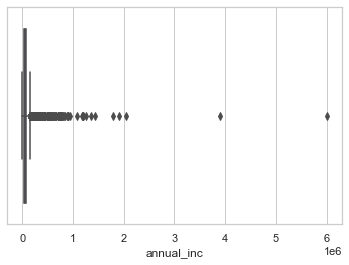

In [660]:
### Cheking annual income again to analyse further

sns.boxplot(ld['annual_inc'])

In [661]:
### The above plot shows presence of outliers in annual income
### getting rid of outliers

qt =ld.annual_inc.quantile([0.25, 0.75,0.90, 0.95,0.96,0.97,0.98, 0.99])
qt

0.25     40000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.96    150000.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

(34784, 47)
count     34784.000000
mean      57426.769426
std       23796.695592
min        4000.000000
25%       39961.500000
50%       54996.000000
75%       74000.000000
max      117000.000000
Name: annual_inc, dtype: float64


C:\Users\asing216\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


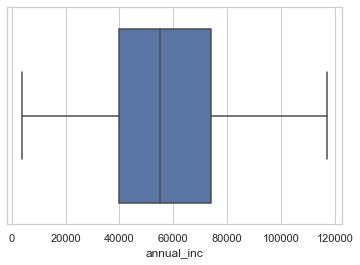

In [664]:
### looks like above 90th percentile the data is chnaing to very large values
p95_ann = ld['annual_inc'].quantile(0.95)
ld = ld[ld.annual_inc <= p95_ann]
sns.boxplot(ld['annual_inc'])
print(ld.shape)
print(ld.annual_inc.describe())

### Creating Bins for continous data to convert it into categorical for further analysis


In [668]:
### Binning continous variable to convert to categorical
lbincome = ['low salary', 'low to medium salary', 'medium to high salary', 'high salary' ,'very high salary']
ld['annual_inc_grp'] = pd.qcut(ld['annual_inc'], q=5,labels = lbincome , precision=0)
                                                                             

<AxesSubplot:xlabel='annual_inc_grp', ylabel='count'>

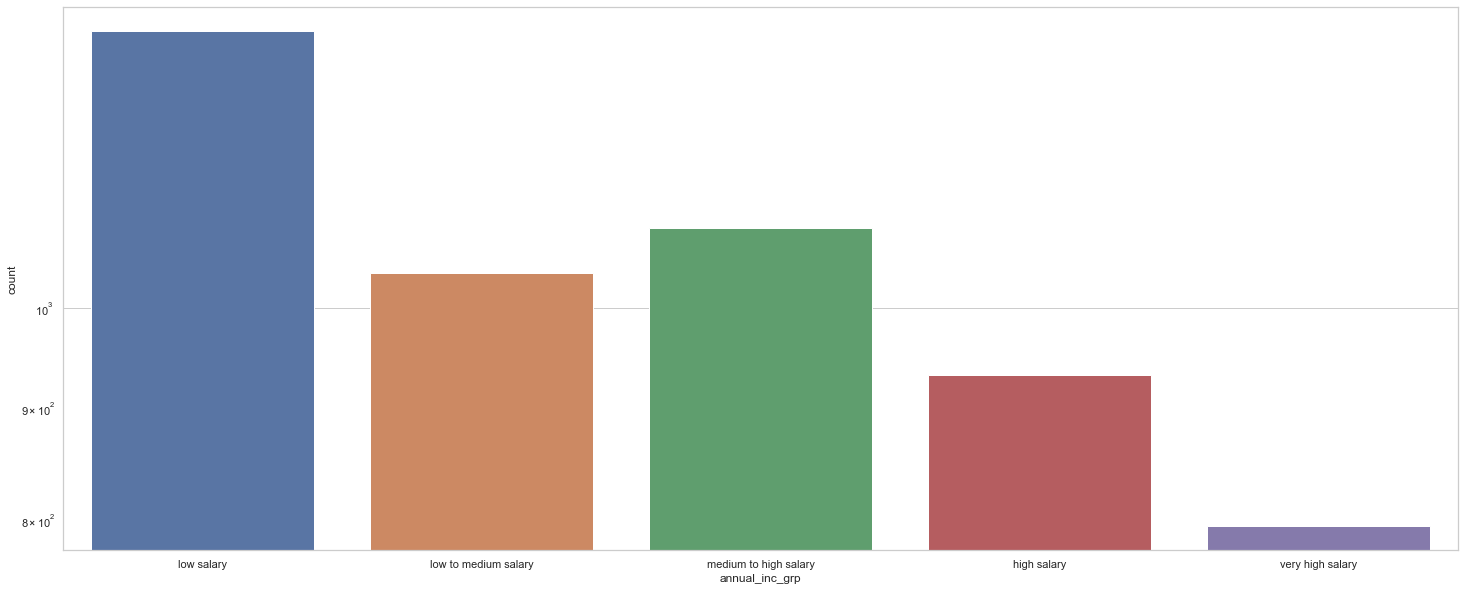

In [676]:
### lets start with annual icome and see which category are the highest defaulters.
### qcut is used to create 5 bins
fig, x = plt.subplots(figsize = (25,10))
x.set_yscale('log')
sns.countplot(x='annual_inc_grp', data=ld[ld['loan_status']=='Charged Off'])

### Lower income group tends to  have high chances of default

<AxesSubplot:xlabel='int_grp', ylabel='count'>

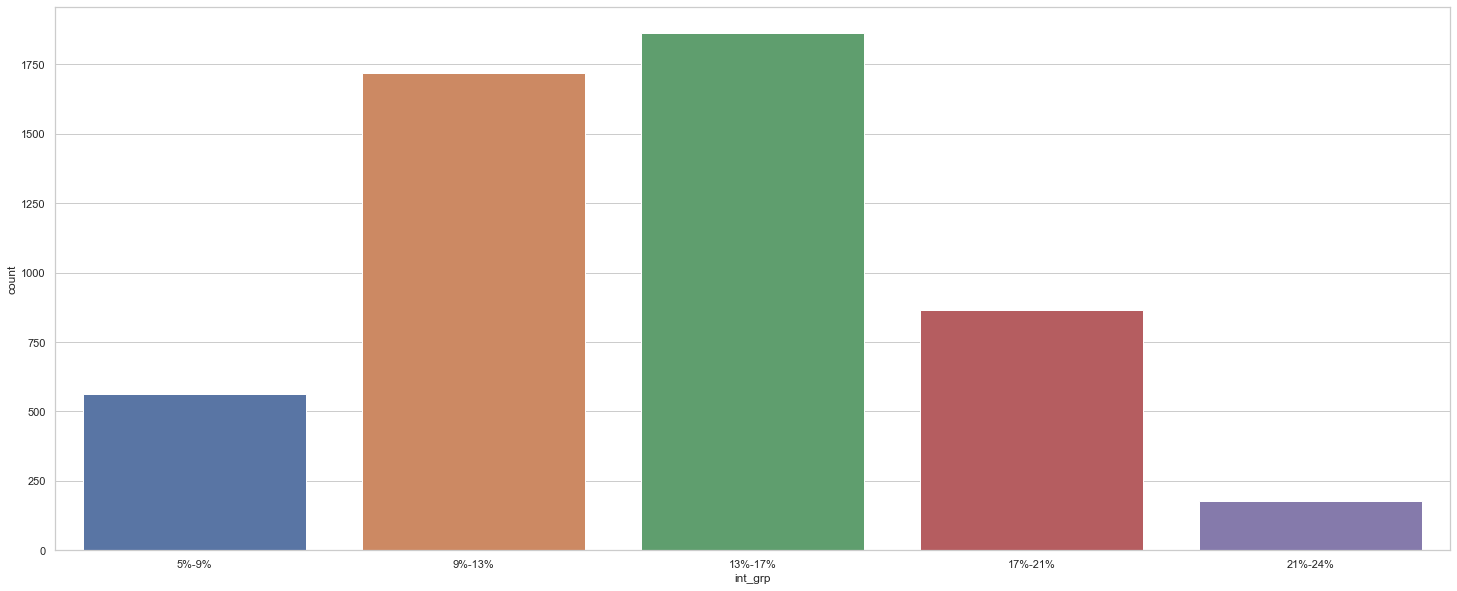

In [677]:
### lets check with int_rates and see which category are the highest defaulters.
### cut is used to create 5 bins
ld['int_grp'] = pd.cut(ld['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='int_grp', data=ld[ld['loan_status']=='Charged Off'])

### Interest rate between 13 to 17 percent have highest defaulters

<AxesSubplot:xlabel='open_acc_grp', ylabel='count'>

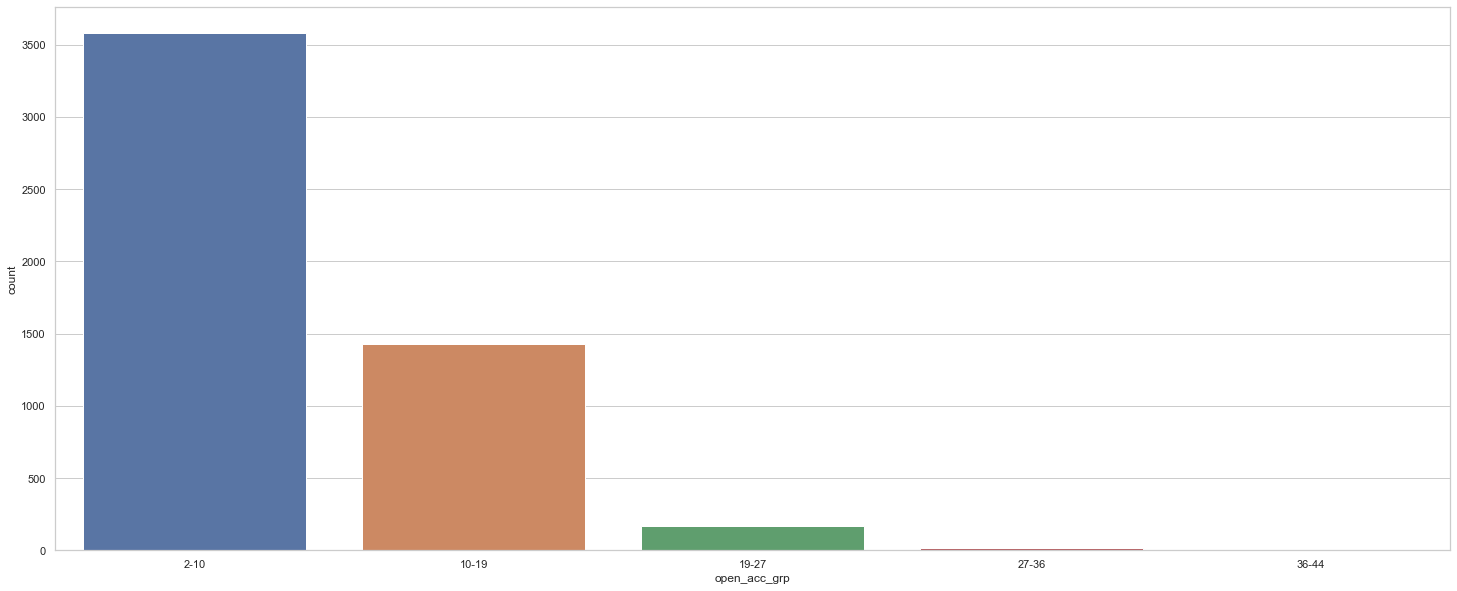

In [679]:
### lets check with open_acc and see which category are the highest defaulters.
### cut is used to create 5 bins
### The number of open credit lines in the borrower's credit file.
ld['open_acc_grp'] = pd.cut(ld['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='open_acc_grp', data=ld[ld['loan_status']=='Charged Off'])

### As the numbers of open accounts go up the number of defaulters come down

<AxesSubplot:xlabel='total_acc_grp', ylabel='count'>

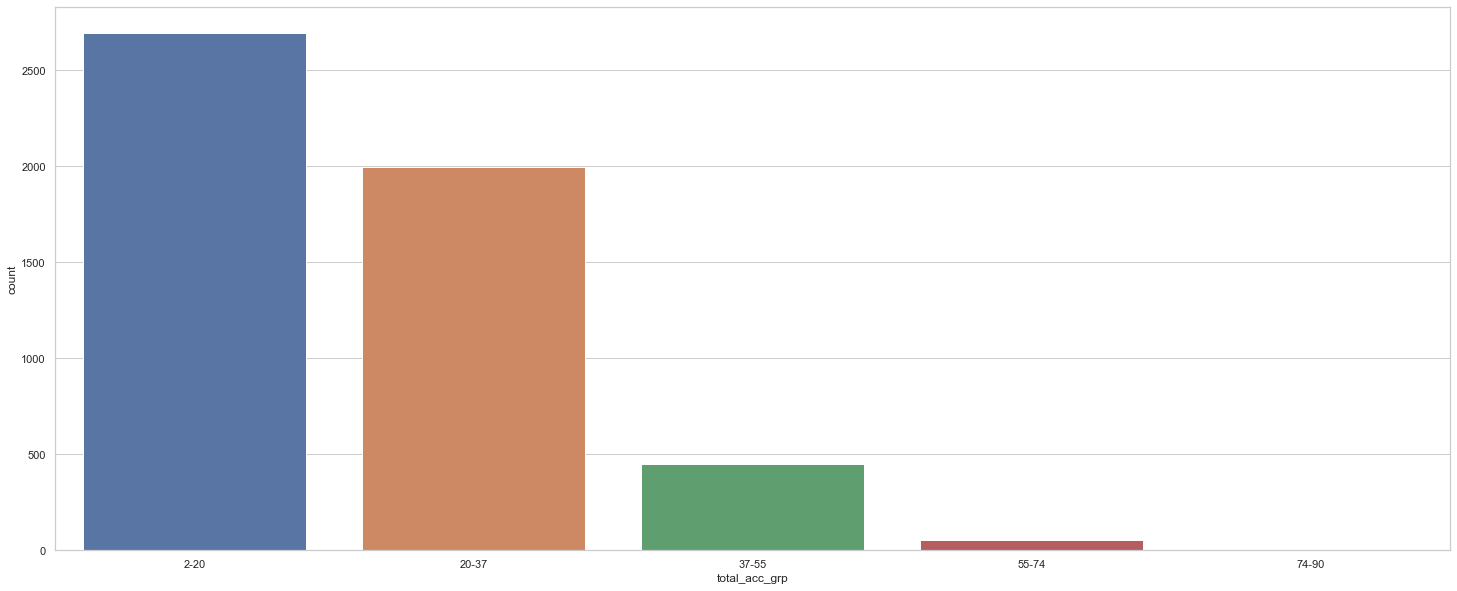

In [682]:
### lets check with total_acc and see which category are the highest defaulters.
### cut is used to create 5 bins
### The total number of credit lines currently in the borrower's credit file
ld['total_acc_grp'] = pd.cut(ld['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='total_acc_grp', data=ld[ld['loan_status']=='Charged Off'])

### It appears that  total_acc and Open_acc are positively correlated and show similar attributes on loan

<AxesSubplot:xlabel='installment_grp', ylabel='count'>

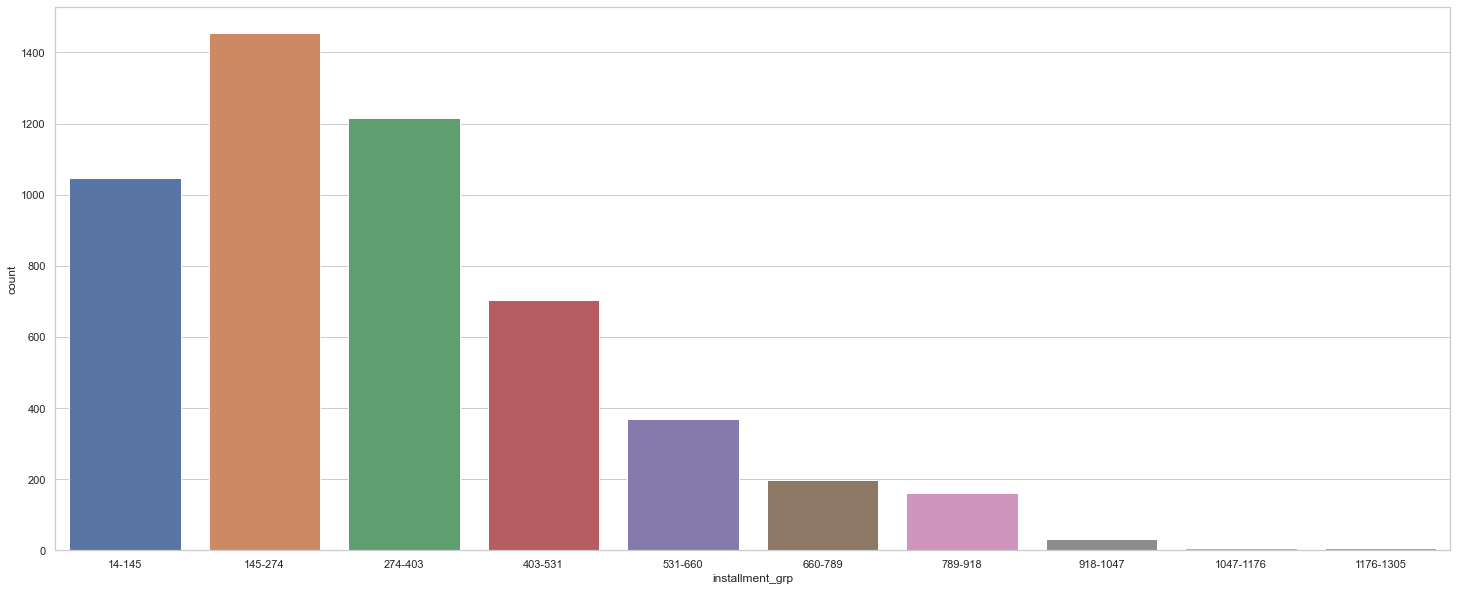

In [684]:
### lets check with installemnt_grp and see which category are the highest defaulters.
### cut is used to create 5 bins
### The monthly payment owed by the borrower if the loan originates.

ld['installment_grp'] = pd.cut(ld['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='installment_grp', data=ld[ld['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_grp', ylabel='count'>

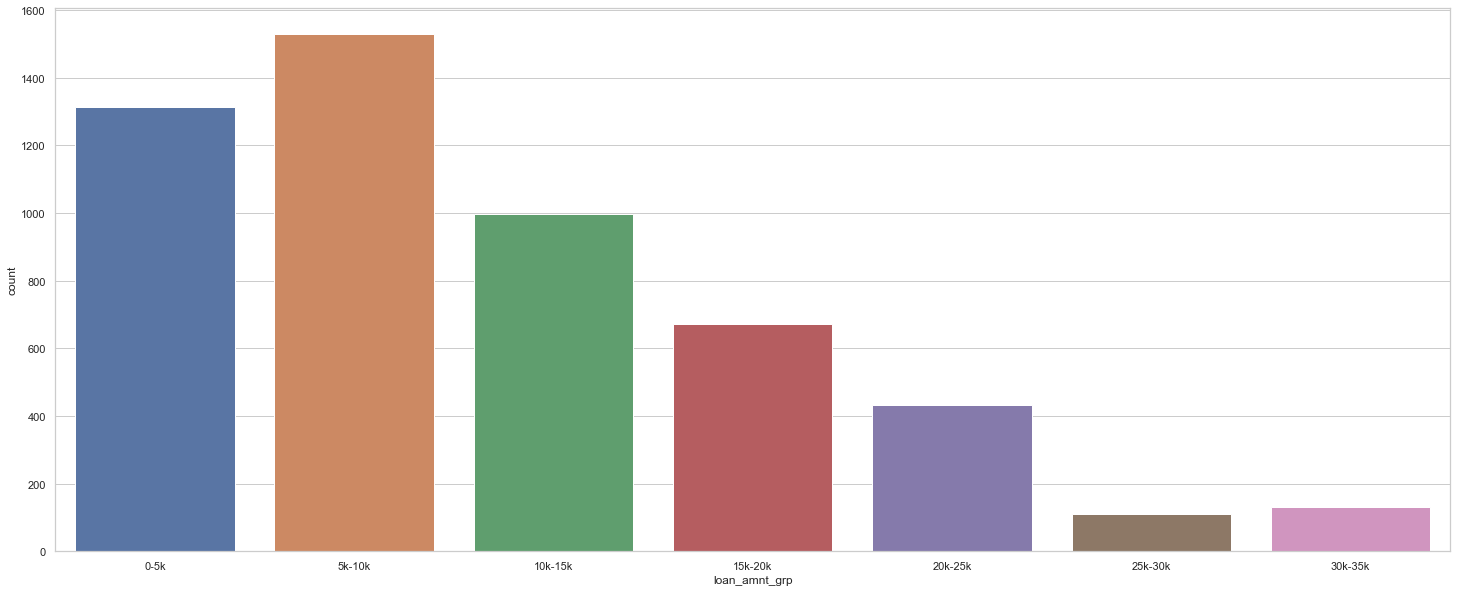

In [685]:
### lets check with loan_amount and see which category are the highest defaulters.
### cut is used to create 5 bins
### The listed amount of the loan applied for by the borrower

ld['loan_amnt_grp'] = pd.cut(ld['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='loan_amnt_grp', data=ld[ld['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_grp', ylabel='count'>

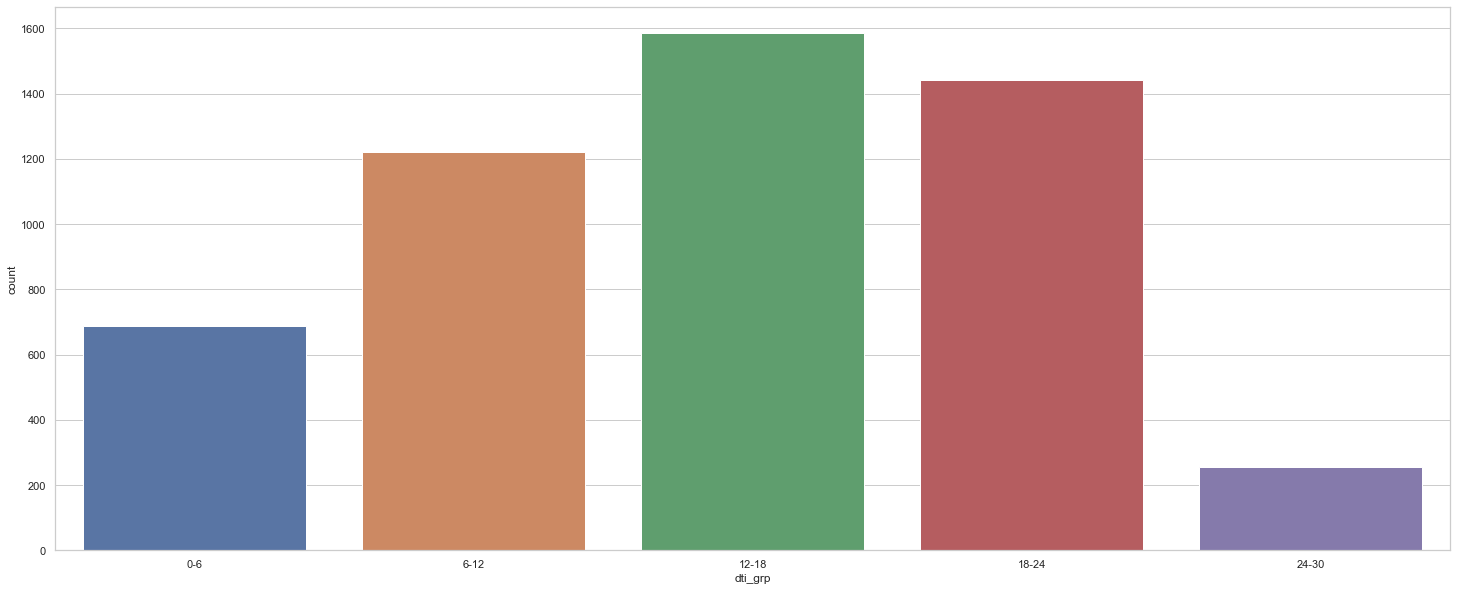

In [686]:
### lets check with dti and see which category are the highest defaulters.
### cut is used to create 5 bins
### A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations

ld['dti_grp'] = pd.cut(ld['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])   
fig, x = plt.subplots(figsize = (25,10))
sns.countplot(x='dti_grp', data=ld[ld['loan_status']=='Charged Off'])

#### DTI between 12-18 have highest defaulters
#### Loan amount between 5-10 k has the highest defaulters
#### Installment between 145 to 274 has the highest number of defaulters

## Bivariate Analysis to follow

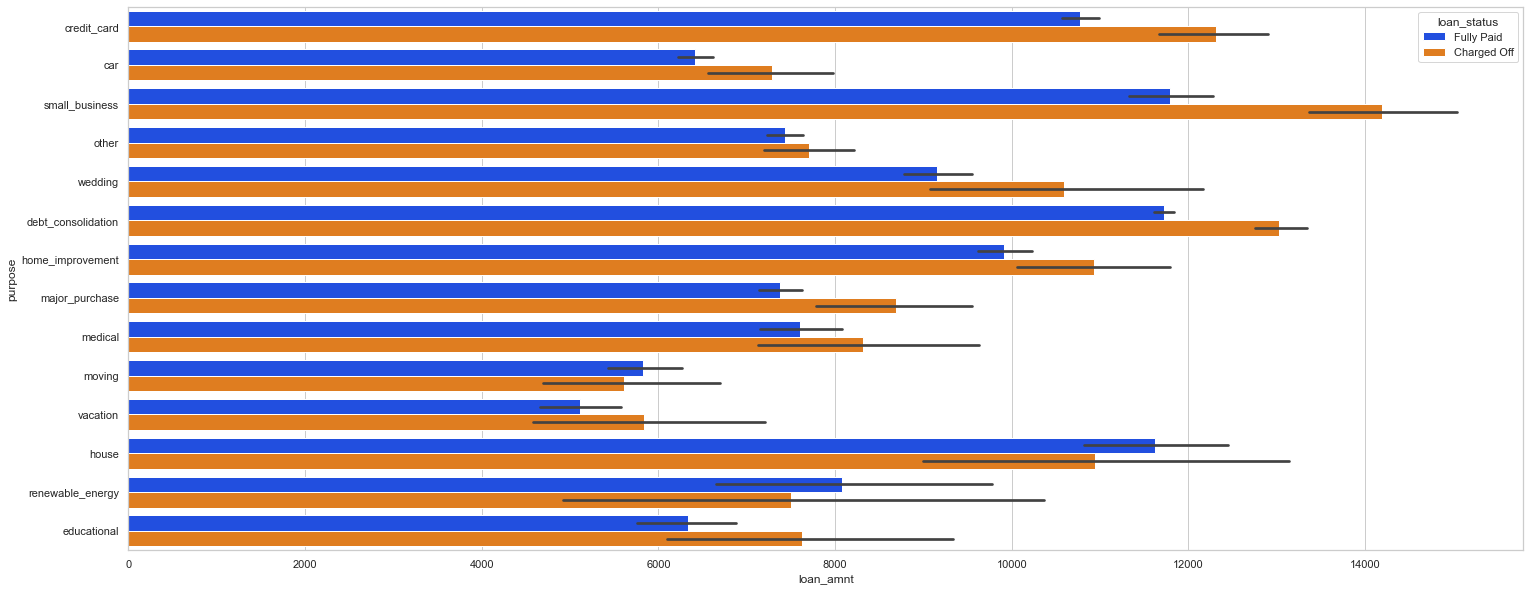

In [694]:
### Analysing Loan_amount with respect of Purpose 
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='loan_amnt', y='purpose', hue ='loan_status',palette="bright")
plt.show()

#### When the purpose is small businesses and defaulters are quite high.
#### The other area where default count is very high when the purpose is debt consolidation

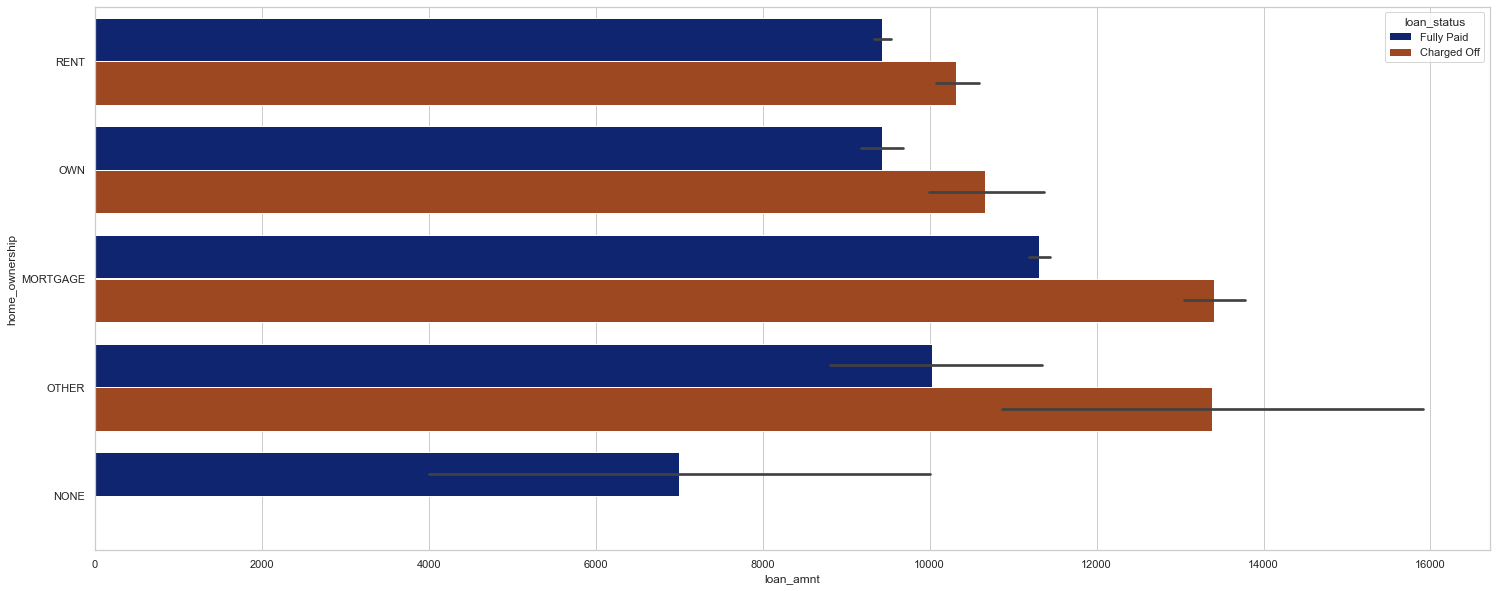

In [696]:
### Analysing Loan_amount with respect of home ownership
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="dark")
plt.show()

#### When people have mortgage and loan amount between 10k to 14k people tend to default
####  When people have Unknow/Oter home ownership and loan amount between 10k to 14k people tend to default


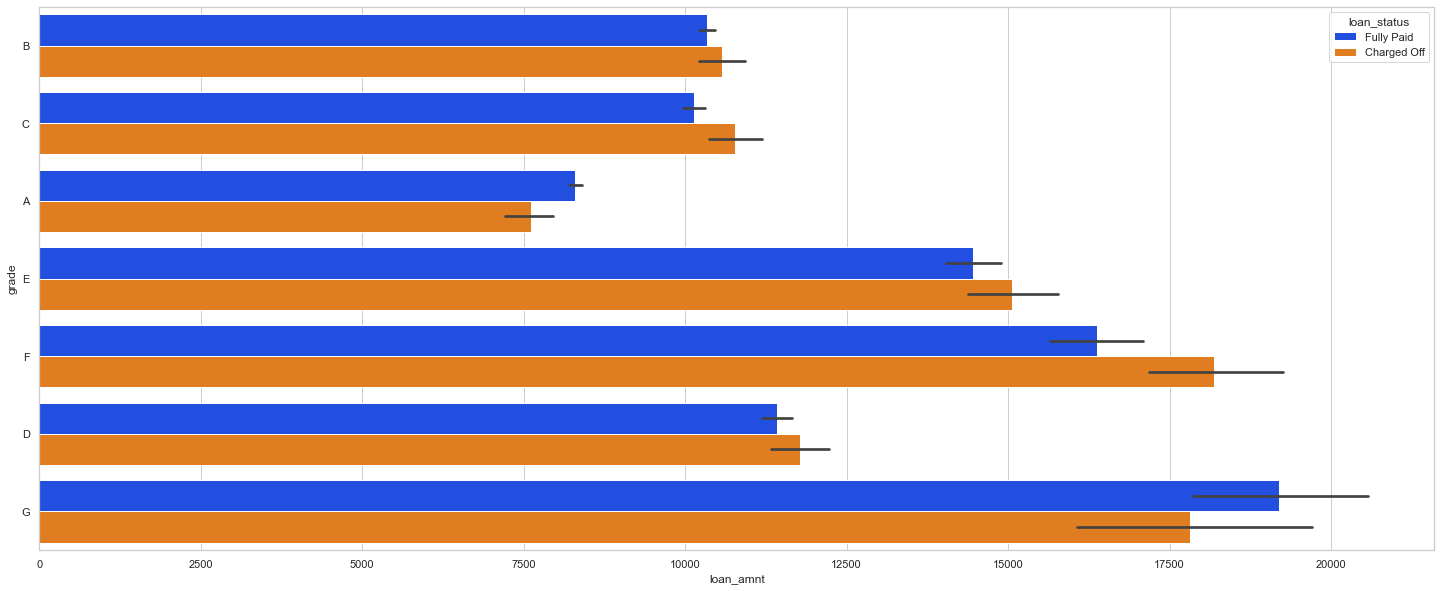

In [697]:
### Analysing Loan_amount with respect of grade
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='loan_amnt', y='grade', hue ='loan_status',palette="bright")
plt.show()

#### when the loan_mount is between 15k to 20 K , and the grade is F ,there are more defaulters

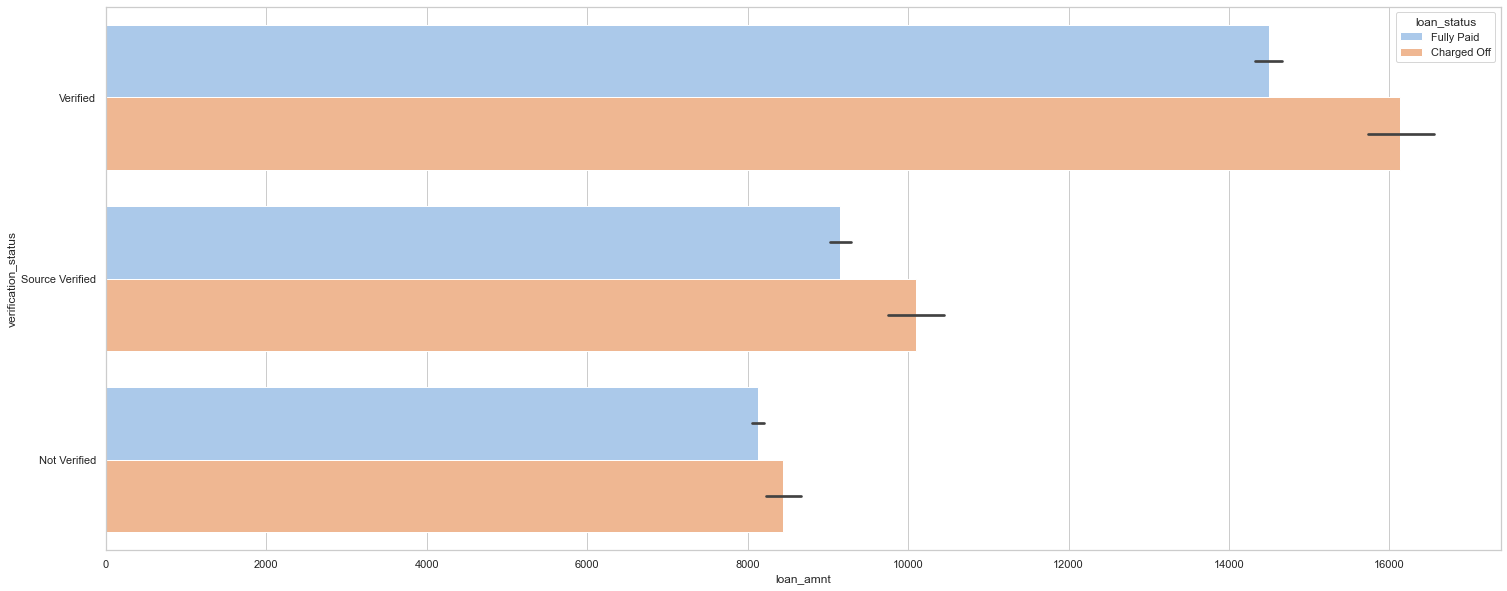

In [701]:
### Analysing Loan_amount with respect of verification status
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='loan_amnt', y='verification_status', hue ='loan_status',palette="pastel")
plt.show()

#### Even when the borrowers are verified if the loan amount exceeds around 14k , they tend to default

<Figure size 432x288 with 0 Axes>

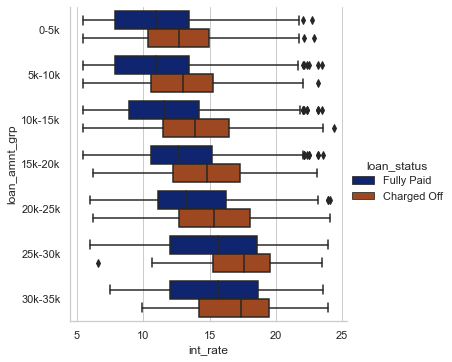

In [720]:
### Analysing Loan_amount_groups with respect of interst rate
plt.tight_layout()
sns.catplot(data =ld,x ='int_rate', y ='loan_amnt_grp', hue ='loan_status',palette="dark",kind = 'box')

#### Across all loan amounts as the loan amount goes higher so does the interest rate and the number of defaults

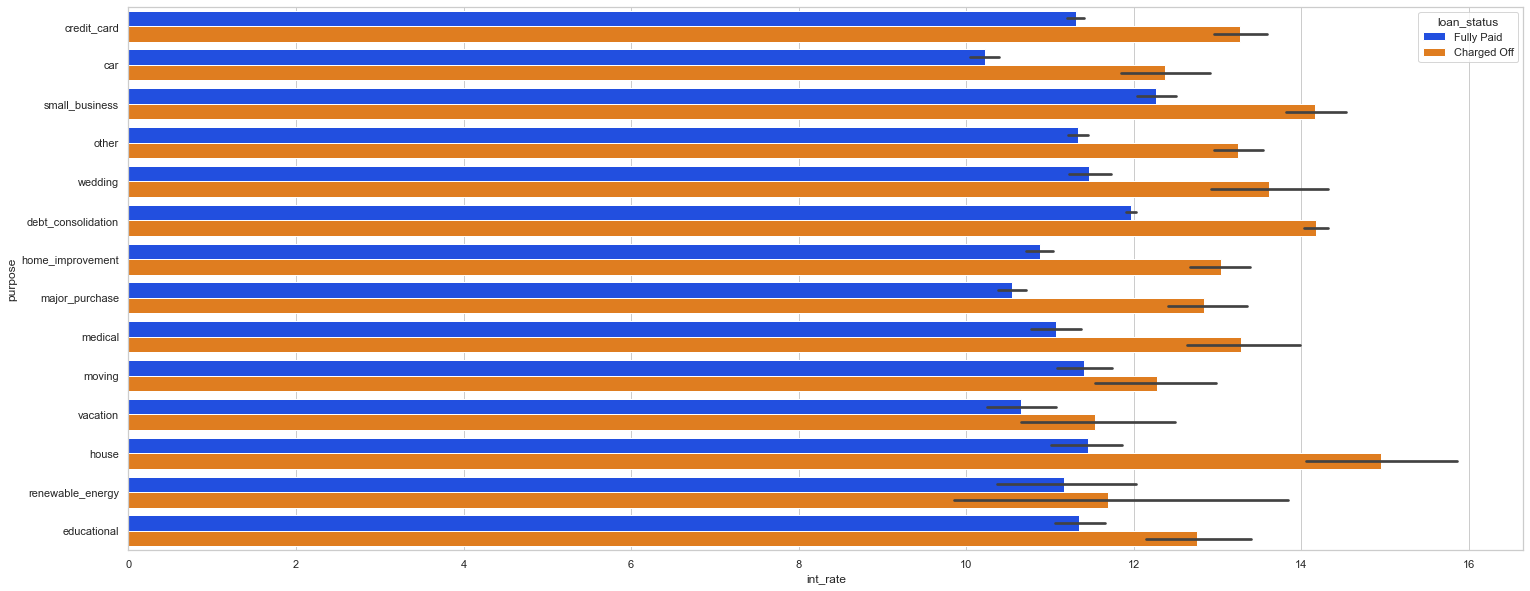

In [721]:
### Analysing int_rate with respect of Purpose 
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='int_rate', y='purpose', hue ='loan_status',palette="bright")
plt.show()

### For high interest rates home loans , the number of deafulters is high as well
### For higher interest rates , across all purposes , if the interest rats go higher than 10% , the numbers of defaulters vs fully paid increases

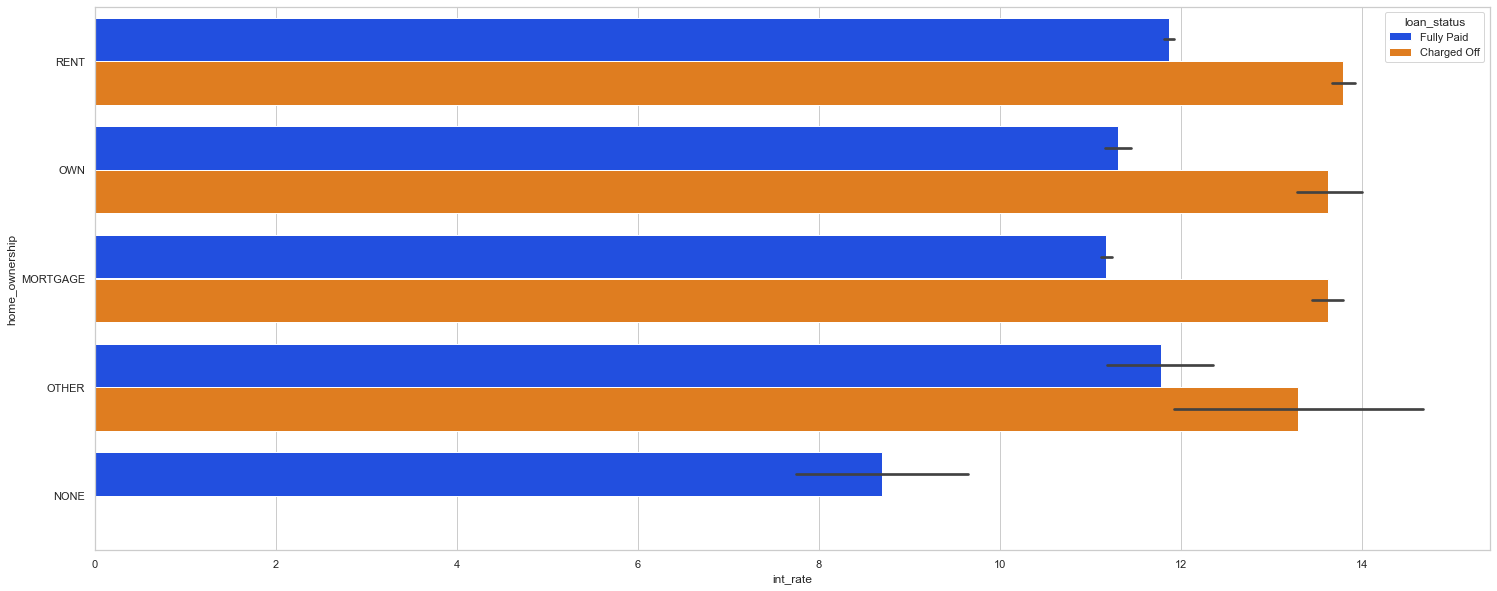

In [722]:
### Analysing int_rate with respect of home ownership
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='int_rate', y='home_ownership', hue ='loan_status',palette="bright")
plt.show()

#### Interest ratesif higher for people on rent also tends to increase the numbers of defaulters

<Figure size 432x288 with 0 Axes>

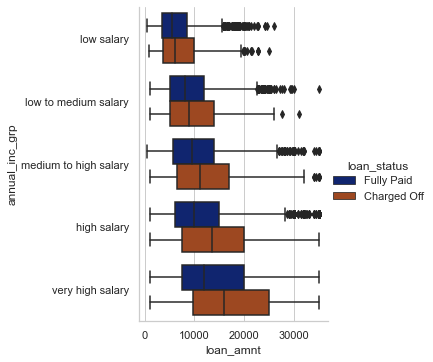

In [724]:
### Analysing loan amount with respect of interst rate
plt.tight_layout()
sns.catplot(data =ld,x ='loan_amnt', y ='annual_inc_grp', hue ='loan_status',palette="dark",kind = 'box')

<Figure size 432x288 with 0 Axes>

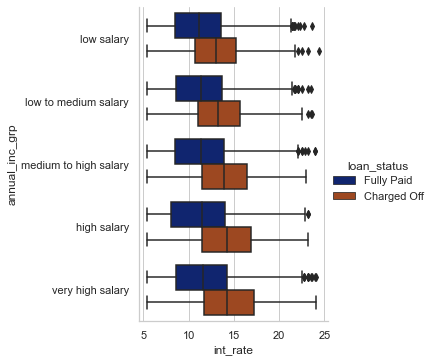

In [725]:
### Analysing annual income with respect of interst rate
plt.tight_layout()
sns.catplot(data =ld,x ='int_rate', y ='annual_inc_grp', hue ='loan_status',palette="dark",kind = 'box')

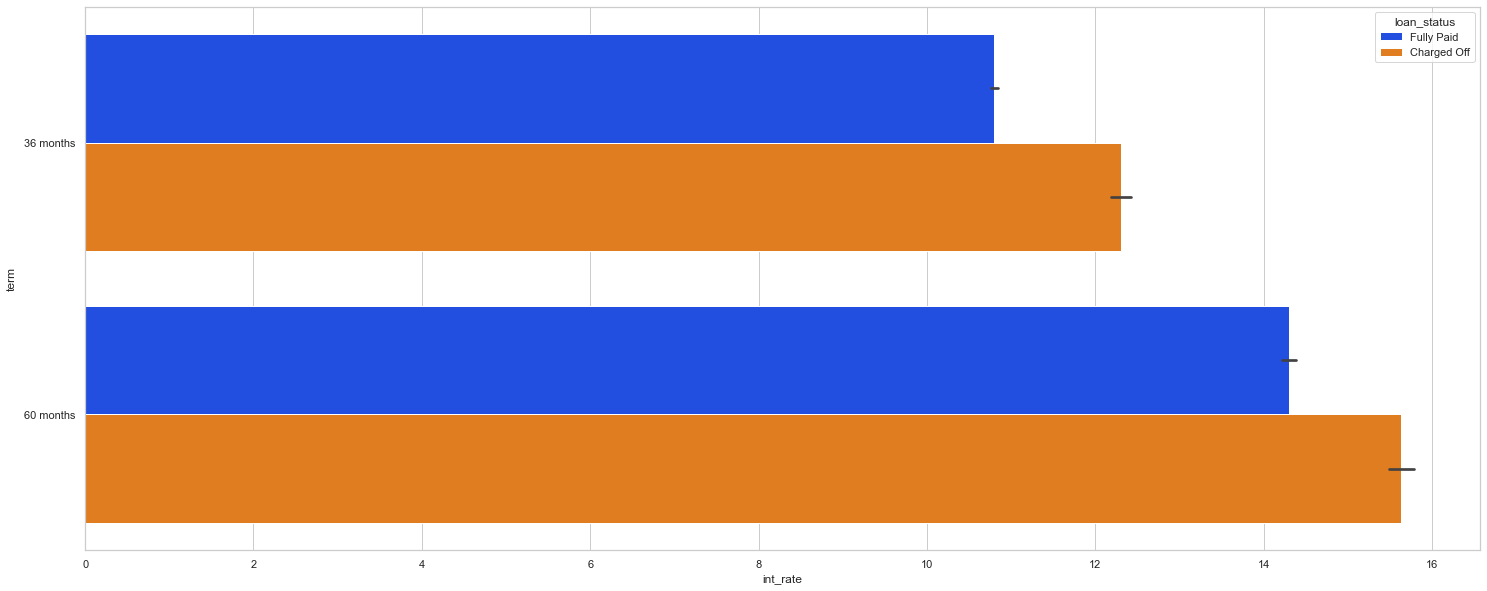

In [726]:
### Analysing int_rate with respect of term
plt.figure(figsize=(25,10))
sns.barplot(data =ld,x='int_rate', y='term', hue ='loan_status',palette="bright")
plt.show()

## Some of the key Observations
    Home ownership of Mortgage and Rent types have higher number of defaulters
    When the loans are taken for Debt Consolidationa dn Small business , the number of defaulters are higher
    Verification status does not help the lenders because even verified borrowers tend to default if the laon amount is morethan 14k.
    Higher the number of open accounts and total accounts lesser are number of defaulters 
    Across all loan amounts as the loan amount goes higher so does the interest rate and the number of defaults
    Interest rates higher than equal to 14 percent tend to increase the number of defaulters across all income groups.
    When people have mortgage and loan amount between 10k to 14k people tend to default
    When people have Unknow/Other home ownership and loan amount between 10k to 14k people tend to default.
    Across all loan amounts as the loan amount goes higher so does the interest rate and the number of defaults
    For higher interest rates , across all purposes , if the interest rates go higher than 10% , the numbers of defaulters vs fully paid increases.

### The Key variables to consider when checking the tendency to default
    High Interest rates
    Purpose such as small business or debt consoildation
    Home owenership such as Rent or Mortgage
    High Loan amounts vs the annual income
    Higher term duration having higher interest rates of more than 14% 
    